In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [48]:
dic='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/analysis results/newresults/specmap/'
specmap_name='spec_ap.out'
specmap_model_name='spec_ap_model.out'
spectral_para_name='spec_para.out'
spectral_axis__model_name='spec_axis_model.out'
specnoise_name='spec_noise.out'
ramap_name='ra_ap.out'
decmap_name='dec_ap.out'
spectral_axis_name='spec_axis.out'
specmap=np.genfromtxt(dic+specmap_name,delimiter=',')
specmap_model=np.genfromtxt(dic+specmap_model_name,delimiter=',')
ramap=np.genfromtxt(dic+ramap_name,delimiter=',')
decmap=np.genfromtxt(dic+decmap_name,delimiter=',')
spectral_axis=np.genfromtxt(dic+spectral_axis_name,delimiter=',')
spectral_axis_model=np.genfromtxt(dic+spectral_axis__model_name,delimiter=',')
spectral_noise=np.genfromtxt(dic+specnoise_name,delimiter=',')
spectral_para=np.genfromtxt(dic+spectral_para_name,delimiter=',')

In [49]:
dic='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/analysis results/newresults/ly/'
lyimg_name='lyimg.out'
lyx_name='lyx'
lyy_name='lyy'
lyimg=np.genfromtxt(dic+lyimg_name,delimiter=',')
lyx=np.genfromtxt(dic+lyx_name,delimiter=',')
lyy=np.genfromtxt(dic+lyy_name,delimiter=',')

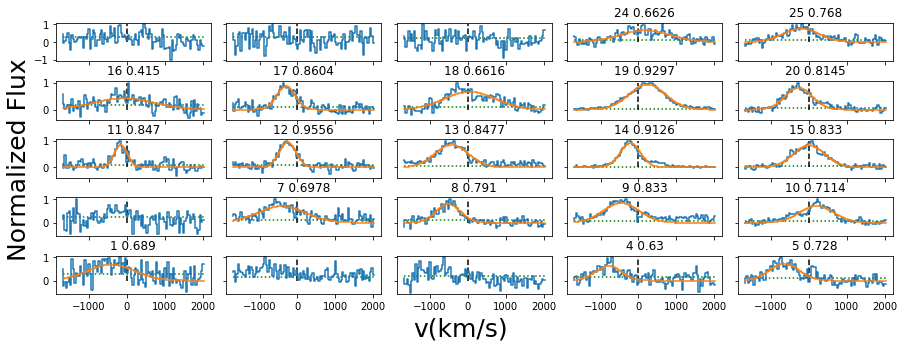

In [53]:
fig_dir='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/paper/ApJtemplate/figs/'
fig,AX=plt.subplots(5,5,sharex=True,sharey='row',figsize=(15,5))
AX=AX.flatten()
for i in range(25):
    AX[20-(i//5)*5+(i%5)].step(spectral_axis,specmap[i,:])
    signal_num=np.where(specmap[i]>spectral_noise[i])[0].shape[0]
    if signal_num>0.42*101 and spectral_para[i,1]<1000:
        AX[20-(i//5)*5+(i%5)].step(spectral_axis_model,specmap_model[i,:])
        AX[20-(i//5)*5+(i%5)].set_title(str(i+1)+' '+str(spectral_para[i,2].astype(np.float16)))
#     AX[20-(i//5)*5+(i%5)].set_title(str(i+1))
    AX[20-(i//5)*5+(i%5)].hlines(spectral_noise[i],
                                 xmin=spectral_axis.min(),
                                 xmax=spectral_axis.max(),
                                 color='green',linestyles='dotted')
    AX[20-(i//5)*5+(i%5)].vlines(0,ymin=0,ymax=1,color='black',linestyles='dashed')
fig.text(0.5, 0.01, r'v(km/s)', ha='center',fontsize=25.)
fig.text(0.08, 0.5, r'Normalized Flux', va='center', rotation='vertical',fontsize=25.)
plt.rcParams['figure.figsize'] = [14, 14]
plt.subplots_adjust(wspace=0.1,hspace=0.5)
# plt.savefig(fig_dir+'specmap.png',dpi=300)
plt.show()

In [ ]:
###### fig_dir='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/paper/ApJtemplate/figs/'
fig1,ax=plt.subplots(1,1)
ax.contourf(lyx,lyy,lyimg,cmap='Spectral_r',levels=20,
            norm=colors.SymLogNorm(linthresh=3, linscale=0.15))
for i in range(25):
    circle=plt.Circle((decmap[i],ramap[i]),2,fill=False)
    ax.text(decmap[i],ramap[i],str(i+1))
    ax.add_patch(circle)
ax.set_xlabel(r'$\Delta DEC(arcsec)$')
ax.set_ylabel(r'$\Delta RA(arcsec)$')
plt.rcParams['figure.figsize'] = [5, 5]
plt.savefig(fig_dir+'apertmap.png',dpi=300)
# plt.show()

In [38]:
spectral_para

array([[-4.16047198e+02,  6.18596494e+02,  6.88993333e-01],
       [-1.69857486e+03,  2.40763058e+03,  4.25293815e-01],
       [-7.72018961e+02,  4.63842204e+02,  4.63154849e-01],
       [-7.85077755e+02,  3.42371432e+02,  6.29889640e-01],
       [-6.49400789e+02,  3.92378923e+02,  7.27816910e-01],
       [-2.71607578e+02,  3.35539964e+02,  5.45018580e-01],
       [-4.19139239e+02,  6.26504704e+02,  6.97983005e-01],
       [-5.15495031e+02,  3.19741093e+02,  7.91168535e-01],
       [-4.53861019e+02,  4.74167279e+02,  8.33011623e-01],
       [ 2.08742250e+02,  4.50363890e+02,  7.11430178e-01],
       [-1.57680979e+02,  1.74873274e+02,  8.47364086e-01],
       [-2.57079766e+02,  2.19907429e+02,  9.55705713e-01],
       [-4.24143202e+02,  4.44716149e+02,  8.47520450e-01],
       [-2.11790369e+02,  2.69405867e+02,  9.12396331e-01],
       [ 9.03511874e+00,  4.15439339e+02,  8.33150199e-01],
       [-7.54765633e+01,  7.99608937e+02,  4.15116181e-01],
       [-3.00295071e+02,  2.42623727e+02